### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
###load of libraries

import os
import requests, zipfile, io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##get rid of the annoying warnings
import warnings
warnings.filterwarnings("ignore")

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
####unzip files into working directory
os.chdir('C:\\Users\\Reinaldo\\Desktop\\Reinaldo\\2020\\022020\\17022020')

def download_zip(url):
    """Downloads a zip file available on net and extracts its content"""
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    
    try:
        z.extractall()
        print('Download and extract successfull')
    except:
        print('Error during unzip')
        

        
download_zip('http://files.grouplens.org/datasets/movielens/ml-100k.zip')

### data loading

def data_load():
    """Loads data into a dataframe"""
    df_data = pd.read_table('ml-100k\\u.data', header=None)
    df_data.columns = ['user_id','item_id','rating','timestamp']
    return df_data
    

def item_load():
    """Loads item data into a dataframe"""
    ### using encoding as cp1252 to adapt the data load to the URL codes
    df_item = pd.read_table('ml-100k\\u.item', header=None, encoding='cp1252', sep='|')
    df_item.columns = ['movie_id' , 'movie_title' , 'release_date', 'xxx',
                      'imdb_url' , 'unknown' , 'action', 'adventure', 'animation' ,
                      'children' , 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
                      'film_noir' , 'horror', 'musical', 'mystery', 'romance', 'scifi' ,
                      'thriller' , 'war', 'western']
    df_item.drop(['xxx'], axis=1, inplace=True)
    return df_item
    
def user_load():
    """Loads user data into a dataframe"""
    df_user = pd.read_table('ml-100k\\u.user', header=None, sep='|')
    df_user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    return df_user
    
df_data = data_load()
df_item = item_load()
df_user = user_load()

Download and extract successfull


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
### data
print('data info')
print(df_data.info())

print('data shape')
print(df_data.shape)

print('data describe')
### only for numerical variables
print(df_data[['rating','timestamp']].describe())

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None
data shape
(100000, 4)
data describe
              rating     timestamp
count  100000.000000  1.000000e+05
mean        3.529860  8.835289e+08
std         1.125674  5.343856e+06
min         1.000000  8.747247e+08
25%         3.000000  8.794487e+08
50%         4.000000  8.828269e+08
75%         4.000000  8.882600e+08
max         5.000000  8.932866e+08


In [4]:
### item
print('df_item info')
print(df_item.info())

print('df_item shape')
print(df_item.shape)

print("Does't make sense a describe for this df_item dataframe")


df_item info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
movie_id        1682 non-null int64
movie_title     1682 non-null object
release_date    1681 non-null object
imdb_url        1679 non-null object
unknown         1682 non-null int64
action          1682 non-null int64
adventure       1682 non-null int64
animation       1682 non-null int64
children        1682 non-null int64
comedy          1682 non-null int64
crime           1682 non-null int64
documentary     1682 non-null int64
drama           1682 non-null int64
fantasy         1682 non-null int64
film_noir       1682 non-null int64
horror          1682 non-null int64
musical         1682 non-null int64
mystery         1682 non-null int64
romance         1682 non-null int64
scifi           1682 non-null int64
thriller        1682 non-null int64
war             1682 non-null int64
western         1682 non-null int64
dtypes: int64(20), object(3)
memory usage: 302.3+

In [5]:
### user
print('df_user info')
print(df_user.info())

print('df_user shape')
print(df_user.shape)

print("df_user describe")

##only for numerical variables
print(df_user[['age']].describe())

df_user info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB
None
df_user shape
(943, 5)
df_user describe
              age
count  943.000000
mean    34.051962
std     12.192740
min      7.000000
25%     25.000000
50%     31.000000
75%     43.000000
max     73.000000


#### 4. Find the number of movies per genre using the item data - 5 marks

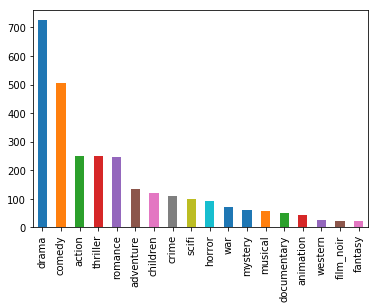

In [6]:
# use sum on the default axis
collist = ['action','adventure','animation','children','comedy','crime','documentary','drama','fantasy','film_noir','horror',
'musical','mystery','romance','scifi','thriller','war','western']

df_item[collist].sum(axis=0).sort_values(axis=0, ascending=False).plot.bar()

#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1
more_than_one = df_item[df_item[collist].sum(axis=1) > 1]
more_than_one.head(50)

,movie_id,movie_title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,11,Seven (Se7en) (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Se7en%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,12,"Usual Suspects, The (1995)",14-Aug-1995,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13,14,"Postino, Il (1994)",01-Jan-1994,"http://us.imdb.com/M/title-exact?Postino,%20Il...",0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
print('before deleting')
print(df_item.shape)

ix_names = df_item[df_item['unknown']==1].index

#Delete these rows indexes from dataframe

df_item.drop(ix_names, inplace=True)

print('after deleting')
print(df_item.shape)

before deleting
(1682, 23)
after deleting
(1680, 23)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: use bar plot for rating, countplot/distplot for age; release date and countplot for gender and occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [10]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


Text(0,0.5,'Total Movies')

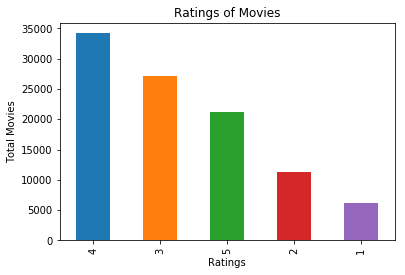

In [11]:
#### Rating Barplot
ax = df_data['rating'].value_counts().plot.bar()
ax.set_title('Ratings of Movies')
ax.set_xlabel('Ratings')
ax.set_ylabel('Total Movies')

Text(0,0.5,'Percentage')

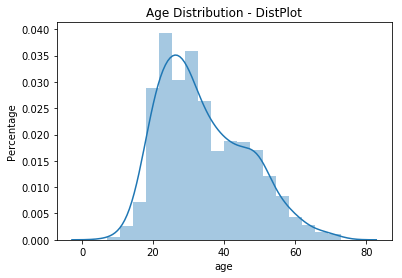

In [12]:
## Distplot on Age
ax = sns.distplot(df_user['age'])
ax.set_title('Age Distribution - DistPlot')
ax.set_ylabel('Percentage')

Text(0.5,1,'Age - Countplot')

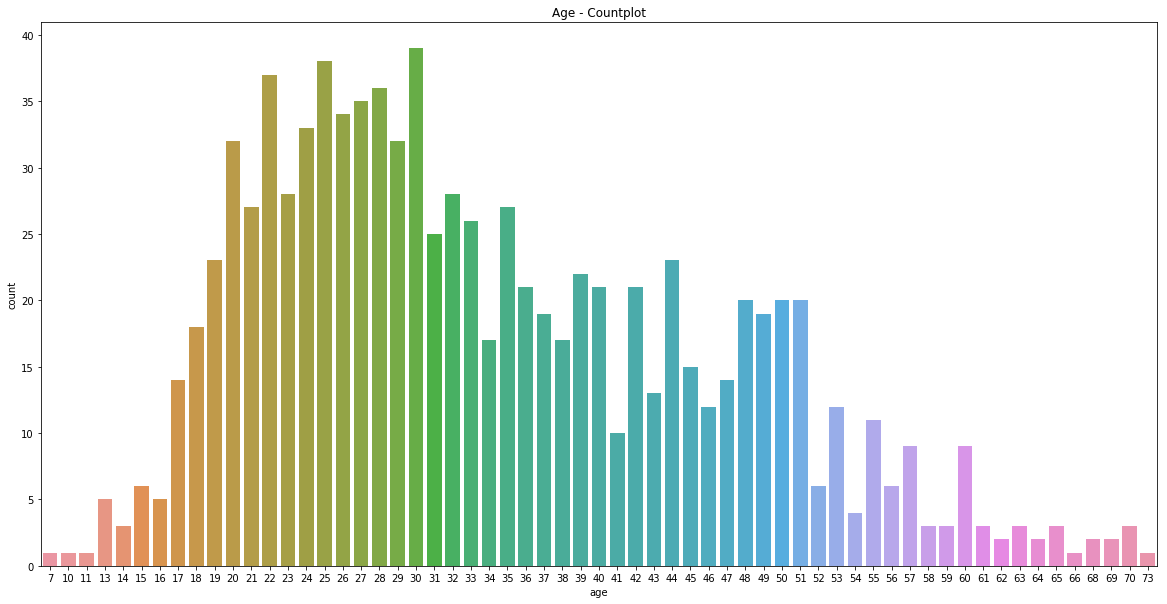

In [13]:
### countplot on Age
plt.figure(figsize=(20,10))
ax = sns.countplot(df_user['age'])
ax.set_title('Age - Countplot')

Text(0.5,1,'Number of releases X year')

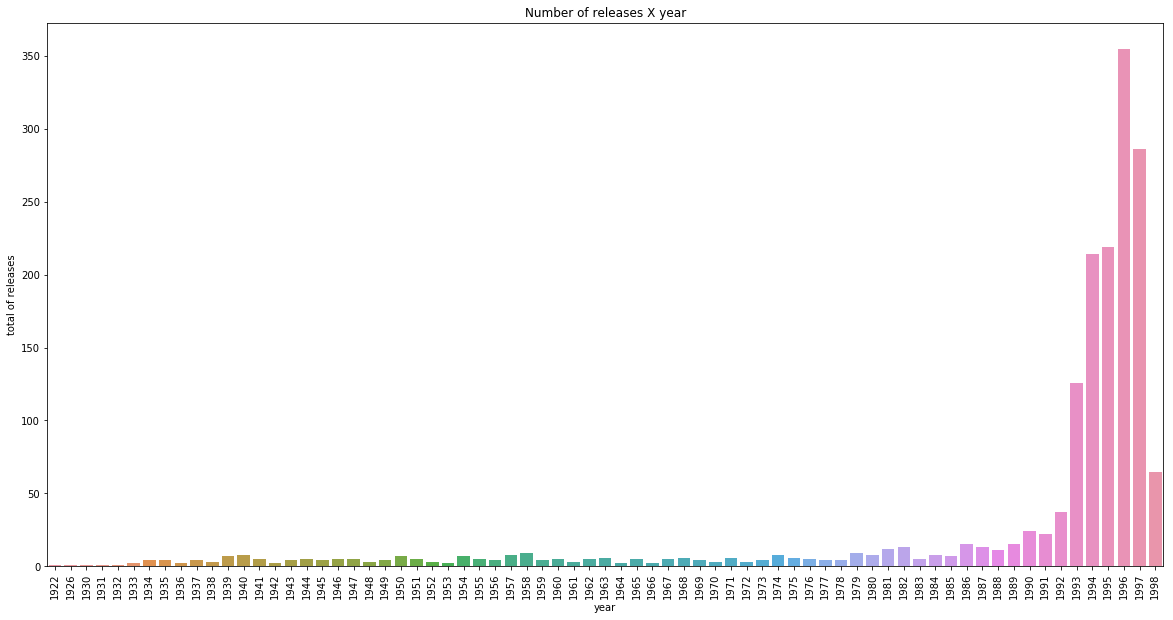

In [14]:
### Year of release

def extract_year(full_date):
    """This function returns the year of a date in format dd-mm-yyyy"""
    vl = []
    for x in full_date:
        vl.append(x.split('-')[2])
    return vl


plt.figure(figsize=(20,10))
ax = sns.countplot(extract_year(df_item['release_date']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('year')
ax.set_ylabel('total of releases')
ax.set_title('Number of releases X year')


Text(0,0.5,'total reviews')

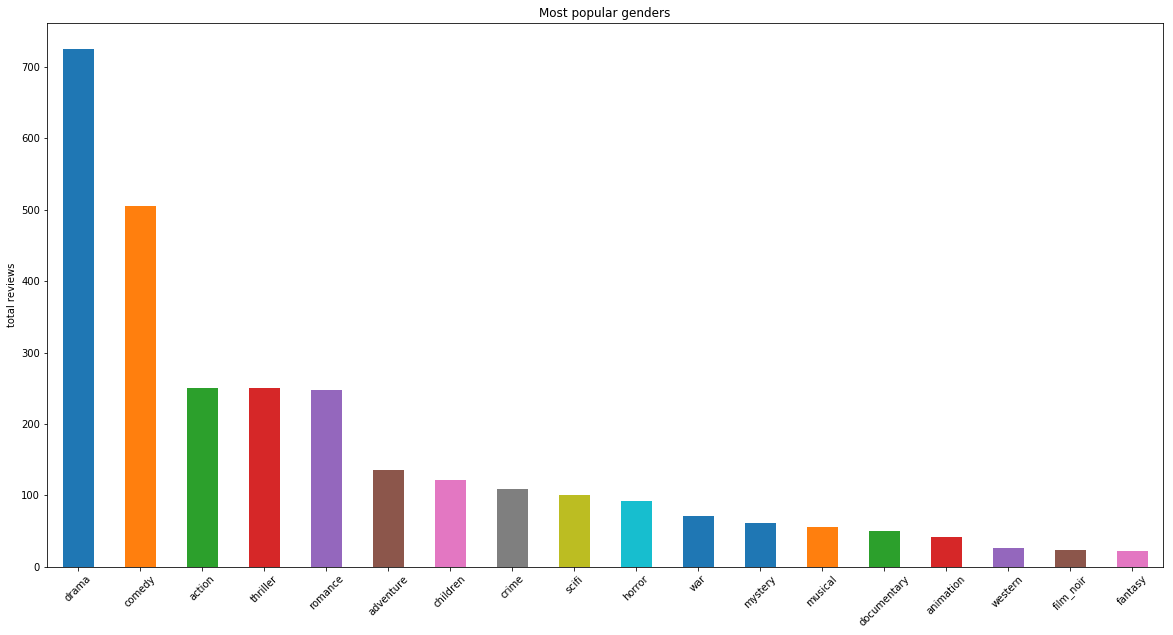

In [15]:
############# Gender ###############
plt.figure(figsize=(20,10))
ax = df_item[collist].sum(axis=0).sort_values(axis=0, ascending=False).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Most popular genders')
ax.set_ylabel('total reviews')

Text(0.5,1,'Occupation')

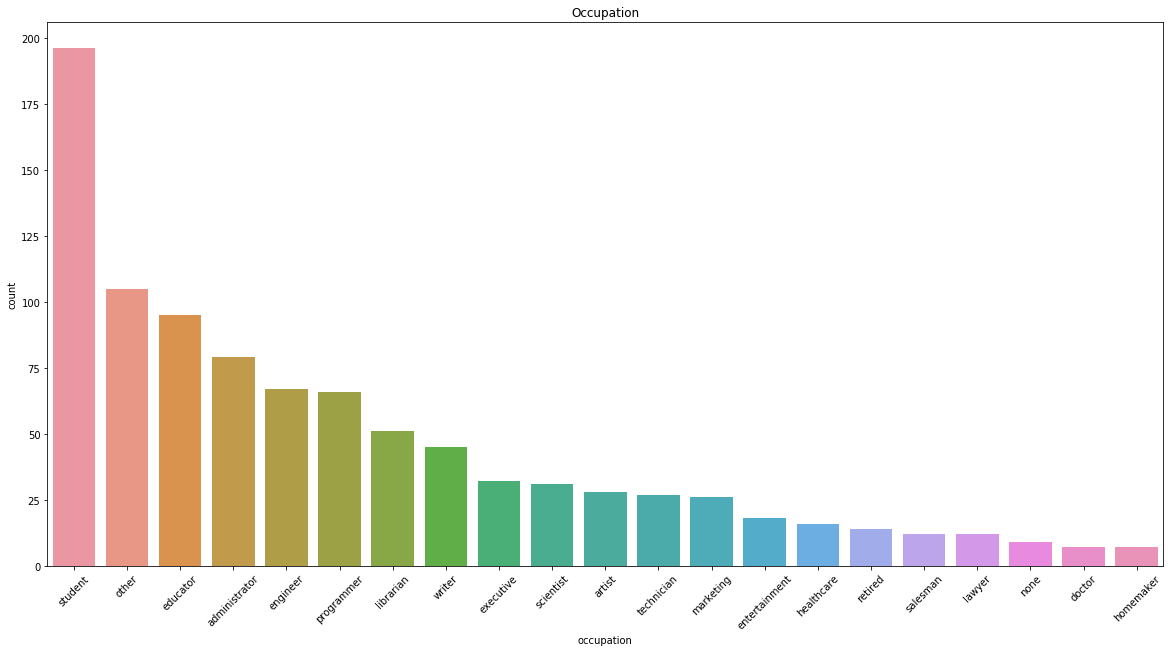

In [16]:
############ Occupation ############

plt.figure(figsize=(20,10))
ax = sns.countplot(x = 'occupation', data=df_user, order = df_user['occupation'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Occupation')

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

Text(159,0.5,'Year of release')

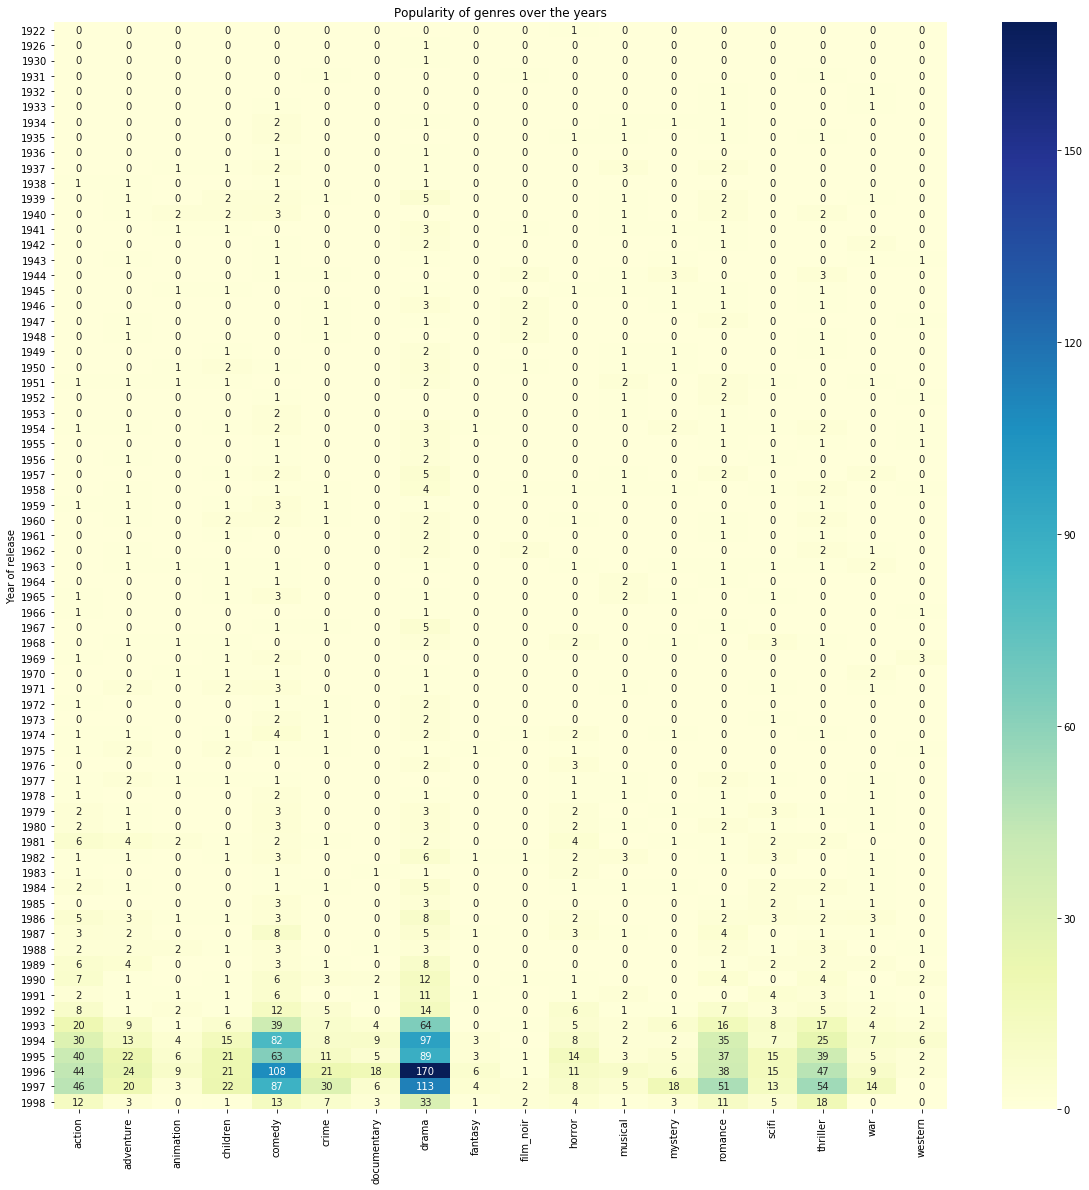

In [17]:
#Your answer here
df_item['year'] = extract_year(df_item['release_date'])

new_df_item = df_item[['year','action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']].groupby(['year']).sum()



new_df_item.index = new_df_item.index.map(int)

##how popularity of genres has changed over the years.
plt.figure(figsize=(20,20))
ax = sns.heatmap(new_df_item, annot=True, fmt='d', cmap='YlGnBu')
ax.set_title('Popularity of genres over the years')
ax.set_ylabel('Year of release')



### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [18]:
#your answer here
#1 I haven't use merge, but I reached the same result as I would.
more_100_ratings = df_data[['user_id','item_id']].groupby(['item_id']).count()>100
more_100_ratings_lst = more_100_ratings[more_100_ratings['user_id'] == True].index.tolist()
more_100_ratings_names = df_item[df_item['movie_id'].isin(more_100_ratings_lst)]['movie_title'].tolist()

#2
all_movie_ratings = pd.merge(df_data, df_item, left_on='item_id', right_on='movie_id', how='inner')
all_movie_ratings = all_movie_ratings[['movie_title','rating']].groupby('movie_title').mean()
all_movie_ratings.sort_values(by='rating', ascending=False, inplace=True)

#3
all_movie_ratings[all_movie_ratings.index.isin(more_100_ratings_names)]


,rating
movie_title,
"Close Shave, A (1995)",4.491071
Schindler's List (1993),4.466443
"Wrong Trousers, The (1993)",4.466102
Casablanca (1942),4.456790
"Shawshank Redemption, The (1994)",4.445230
Rear Window (1954),4.387560
"Usual Suspects, The (1995)",4.385768
Star Wars (1977),4.358491
12 Angry Men (1957),4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [36]:
def gender_x_genre(genre):
    movies = pd.merge(df_item[df_item[genre]==1][['movie_id']], df_data, left_on='movie_id', right_on='item_id', how='inner')
    movies = movies.merge(df_user[['user_id','gender']], on='user_id', how='inner')
    movies_gender = movies[['movie_id','gender']].groupby('gender').count()
    movies_gender['prop'] = movies_gender['movie_id'] / movies_gender['movie_id'].sum()*100
    ax = sns.barplot(x=movies_gender.index, y='prop', data=movies_gender)
    ax.set_ylabel('Percent')


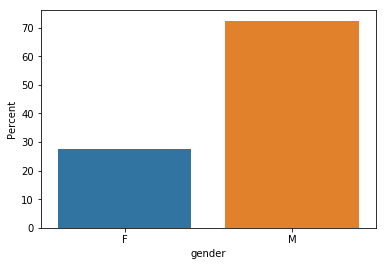

In [37]:
# Men watch more drama than women?
gender_x_genre('drama')

Yes, men watch more drama than women.

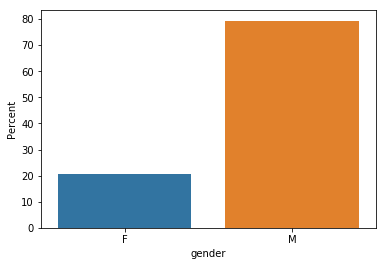

In [38]:
# Women watch more Sci-Fi than men?
gender_x_genre('scifi')

No, Men watch more Scifi than women.

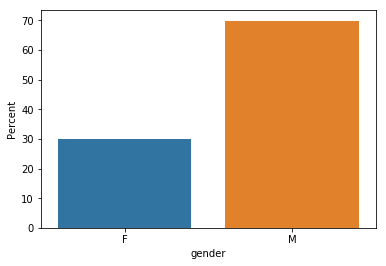

In [39]:
# Men watch more Romance than women
gender_x_genre('romance')

Yes, men watch more romance than women.

<b>Conclusion:</b> The dataset is unbaleced for the masculine gender. So any kind of analysis by this perspective will give men as the main gender for any movie review.